In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Eurovision Winners - Winner Data KG-3.csv")

In [3]:
df.head()

,Year,Country,Song,Artist,Songwriter(s),Running Order,Semi Final Points,Total Points,Location
0,1956,Switzerland,"""Refrain""",Lys Assia,Géo Voumard\nÉmile Gardaz,9.0,NaN,0.0,Lugano
1,1957,Netherlands,"""Net als toen""",Corry Brokken,Guus Jansen\nWilly van Hemert,6.0,NaN,31.0,Frankfurt
2,1958,France,"""Dors, mon amour""",André Claveau,Hubert Giraud\nPierre Delanoë,3.0,NaN,27.0,Hilversum
3,1959,Netherlands,"""Een beetje""",Teddy Scholten,Dick Schallies\nWilly van Hemert,5.0,NaN,21.0,Cannes
4,1960,France,"""Tom Pillibi""",Jacqueline Boyer,André Popp\nPierre Cour,13.0,NaN,32.0,London


In [4]:
df.shape

(70, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70 non-null     int64  
 1   Country            70 non-null     object 
 2   Song               69 non-null     object 
 3   Artist             69 non-null     object 
 4   Songwriter(s)      69 non-null     object 
 5   Running Order      69 non-null     float64
 6   Semi Final Points  15 non-null     float64
 7   Total Points       69 non-null     float64
 8   Location           66 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 5.1+ KB


In [6]:
#Checking for missing values
df.isnull().sum()

Year                  0
Country               0
Song                  1
Artist                1
Songwriter(s)         1
Running Order         1
Semi Final Points    55
Total Points          1
Location              4
dtype: int64

In [7]:
#dropping the 'semi final points' column
df = df.drop(labels = 'Semi Final Points', axis = 1)

In [8]:
#dropping the 'location' column also as 'country' is already mentioned
df = df.drop(labels = 'Location', axis = 1)

In [9]:
#removing the row where 'total Points' is null
df.dropna(subset =['Total Points'], inplace = True)

In [10]:
df.isnull().sum()

Year             0
Country          0
Song             0
Artist           0
Songwriter(s)    0
Running Order    0
Total Points     0
dtype: int64

In [11]:
#getting the statistical measures of the dataset
df.describe()

,Year,Running Order,Total Points
count,69.000000,69.000000,69.000000
mean,1987.681159,13.101449,182.101449
std,19.241876,6.259452,156.616537
min,1956.000000,1.000000,0.000000
25%,1970.000000,9.000000,47.000000
50%,1987.000000,13.000000,152.000000
75%,2004.000000,18.000000,227.000000
max,2022.000000,24.000000,758.000000


<Figure size 600x600 with 0 Axes>

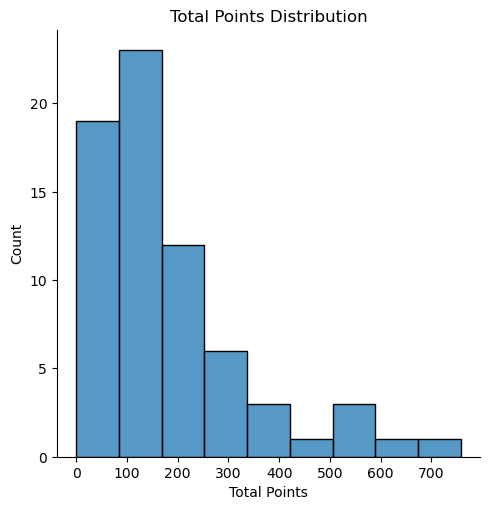

In [12]:
#visualizing total points distribution
plt.figure(figsize = (6,6))
sns.displot(df['Total Points'])
plt.title("Total Points Distribution")
plt.show()

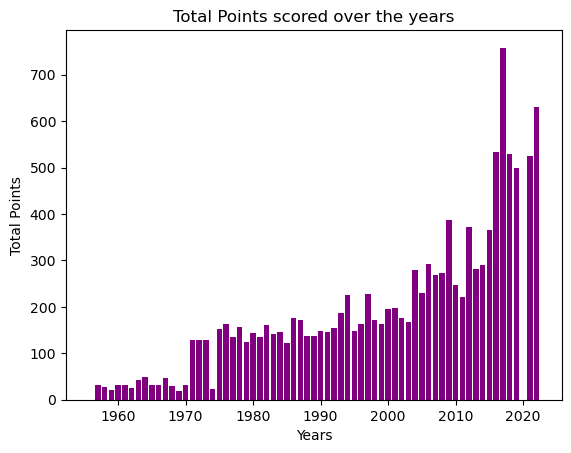

In [13]:
#comparing the total points scored against the year in which it was scored
plt.bar(df['Year'], df['Total Points'], align = 'center', color = 'purple')
plt.title("Total Points scored over the years")
plt.xlabel("Years")
plt.ylabel("Total Points")
plt.show()

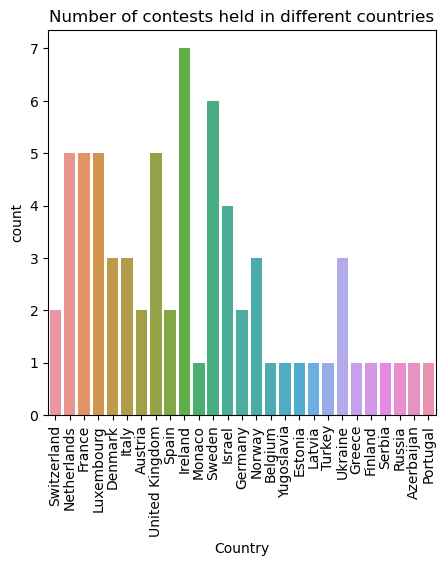

In [14]:
#visualizing the country column
plt.figure(figsize = (5,5))
sns.countplot(x = 'Country', data = df)
plt.xticks(rotation=90)
plt.title("Number of contests held in different countries")
plt.show()
